# Final Code
This document contains our groups final code to extract keywords from given documents and returns a visual and numerical representation linked to their importance. 

In [54]:
#needed installs 
!pip install pypdf2
!pip install textract
!pip install wordcloud

#Needed Imports
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

# import detokeniser
from nltk.tokenize.treebank import TreebankWordDetokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Extracting Key Words by their Names TF-IDF Values
In order to get the key journal's more accurately the following code will be used to get important files by their Names TF-IDF Values, Term Frequency-Inverse Document Frequency, instead of just their names. To begin the key terms must firstly be generated from PDFs which is an improvement over previous attempts where they had to be manually found and entered.
This is done by placing a folder containing any relevant pdf documents in the same directory as the note book. This address can be changed below from the default to another folder when working on data that differs from the default. To do so is the same process as previously when changing the uploaded data.

A list of pdfs should then be returned after, though again due to confidentiality these pdfs have not been supplied.

In [55]:
# import pdf extraction method from local py file
from pdf_Reader import pdf_extraction

# use glob lib to get fileNames
import glob
fileNames = glob.glob("PDFs/*.pdf") #gets all pdf documents in given directory 

# create pdf extraction object and initialise with fileNames
pdf_obj = pdf_extraction(fileNames)

# get pdfs as a list of lists (that contains each pdf doc as a long string)
mypdfs = pdf_obj.get_pdfs_as_text()

# print results of our pdf files
print(mypdfs)

[['Last updated: \n28 March 2020\n27 March 2020\n \nGoal 7: Ensure access to affordable, reliable, sustainable and modern energy for all\n \nTarget 7.1: By 2030, ensure universal access to affordable, reliable and modern energy services\n \nIndicator 7.1.1: Proportion of population with access to electricity\n \n \nInstitutional information\n \n \nOrganization(s):\n \nWorld Bank \nGroup\n \n \nConcepts and definitions\n \n \nDefinition:\n \n \nProportion of population with access to electricity\n \nis the percentage of population with access to \nelectricity.\n \n \nSDG7 \nensure\ns\n \naccess to affordable, reliable, sustainable and modern energy for all. \nSpecifically, \nIndicator \n7.1.1 refers to the p\nroportion of population with access to electricity\n. This is expressed \nin percentage \nfigures and is disaggregated by total, urban and rural \naccess rates per country\n, as well as by UN regional \nand global classifications. \n \n \nRationale:\n \n \nAccess to electricity add

## Preprocessing the PDFs
As seen above preprocessing the PDFS is needed in order to get rid of erroneous text/chars such as stopwords and random characters. The following code shall sequentially go through and split every word into its own string and remove any that are seen as erroneous. All the strings that are left shall be outputted and the number of pdfs given.

In [56]:
#Removal of all stop words, punctuation and erroneous text
def get_tokens(text):
    all_stopwords = stopwords.words('english')
    punc = string.punctuation
    word_toks = word_tokenize(text)
    tokens_without_sw = [word for word in word_toks if not word in all_stopwords]
    tokens_without_punc = [word for word in tokens_without_sw if not word in punc]
    tokens_lower = [word.lower() for word in tokens_without_punc]
    tokens_no_nums = [word for word in tokens_lower if word.isalpha()]
    return tokens_no_nums

In [57]:
#List of all remaining strings
pdf_data_list_of_strings = []
for i, pdf in enumerate(mypdfs):
    pdf_data_list_of_strings.append(get_tokens(mypdfs[i][0]))
pdf_data_list_of_strings

[['last',
  'updated',
  'march',
  'march',
  'goal',
  'ensure',
  'access',
  'affordable',
  'reliable',
  'sustainable',
  'modern',
  'energy',
  'target',
  'by',
  'ensure',
  'universal',
  'access',
  'affordable',
  'reliable',
  'modern',
  'energy',
  'services',
  'indicator',
  'proportion',
  'population',
  'access',
  'electricity',
  'institutional',
  'information',
  'organization',
  'world',
  'bank',
  'group',
  'concepts',
  'definitions',
  'definition',
  'proportion',
  'population',
  'access',
  'electricity',
  'percentage',
  'population',
  'access',
  'electricity',
  'ensure',
  'access',
  'affordable',
  'reliable',
  'sustainable',
  'modern',
  'energy',
  'specifically',
  'indicator',
  'refers',
  'p',
  'roportion',
  'population',
  'access',
  'electricity',
  'this',
  'expressed',
  'percentage',
  'figures',
  'disaggregated',
  'total',
  'urban',
  'rural',
  'access',
  'rates',
  'per',
  'country',
  'well',
  'un',
  'regional',
  

In [58]:
len(pdf_data_list_of_strings)

7

## TF-IDF Values is the Future
Now the text has been cleaned of erroneous strings it can now be used to calculate the TF-IDF values of each string. This will be useful to see what key words are the most important across all documents by giving them a weight according to the frequency that they appear across a document when compared to the other documents.
The TF-IDF values per word is then given below in a table.

In [59]:
#get key word document retriever from local file
from key_word_document_retriever import key_word_document_retriever

# reassign 'mypdfs' variable to detokenised string lists
mypdfs = [TreebankWordDetokenizer().detokenize(lst) for lst in pdf_data_list_of_strings]

doc_ret_obj = key_word_document_retriever(mypdfs)
mat, word = doc_ret_obj.get_tfidf()

df_tfidf_pdfs = pd.DataFrame(mat, columns=word)
df_tfidf_pdfs

,ability,able,absence,accelerate,accepted,access,accessible,accordance,according,accordingly,...,workshops,world,would,xisting,year,yearbook,yearbooks,years,yield,ype
0,0.000000,0.009200,0.034098,0.000000,0.017049,0.278638,0.000000,0.000000,0.012097,0.000000,...,0.000000,0.128799,0.024194,0.000000,0.028578,0.000000,0.000000,0.042010,0.000000,0.000000
1,0.000000,0.006504,0.000000,0.000000,0.000000,0.085866,0.000000,0.000000,0.008552,0.012053,...,0.000000,0.045528,0.000000,0.012053,0.010102,0.000000,0.000000,0.000000,0.012053,0.012053
2,0.018263,0.009855,0.000000,0.000000,0.000000,0.007653,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.068984,0.012958,0.000000,0.007653,0.000000,0.000000,0.022500,0.000000,0.000000
3,0.000000,0.014890,0.000000,0.000000,0.000000,0.011563,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.089340,0.019578,0.000000,0.011563,0.000000,0.000000,0.033996,0.000000,0.000000
4,0.000000,0.019690,0.000000,0.000000,0.000000,0.038228,0.000000,0.000000,0.012945,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.061165,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.034263,0.000000,0.016352,0.000000,0.000000,...,0.065409,0.052944,0.000000,0.000000,0.143904,0.016352,0.016352,0.020147,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.038241,0.000000,0.080127,0.038241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016025,0.000000,0.000000,0.000000,0.000000,0.000000


## Visualising the Collected Data
On their own the TF-IDF values are meaningless as they're difficult to interpret just by reading the, therefore there needs to be a way to visualise the data in an easy to interpret way. Therefore word clouds have been generated for each pdf with the size of a word being proportional to their TF-IDF value. This results in the more meaningful and important a word is the larger it shall appear. It should be noted that the colour a word is given has no meaning and is randomly selected.

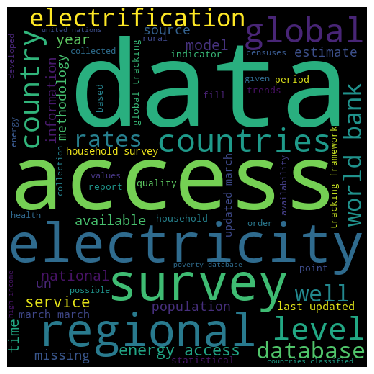

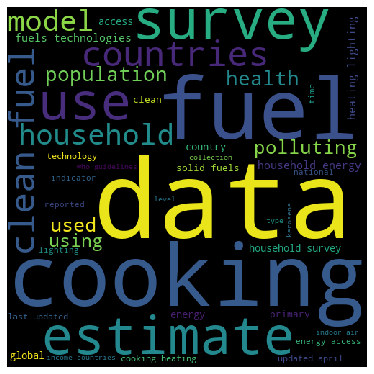

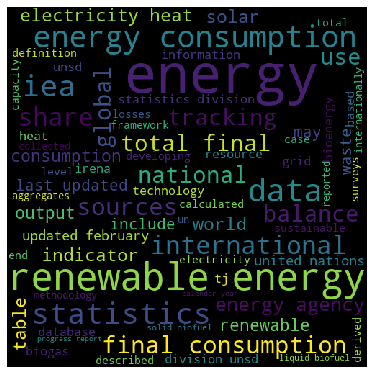

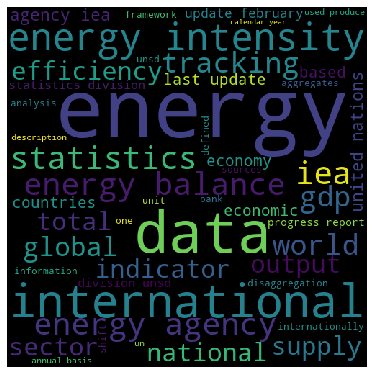

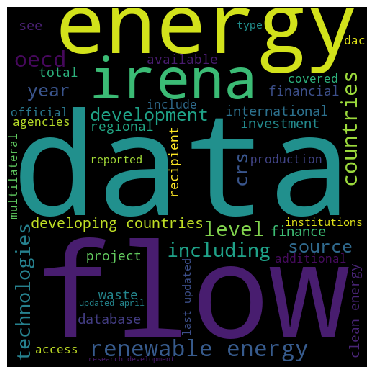

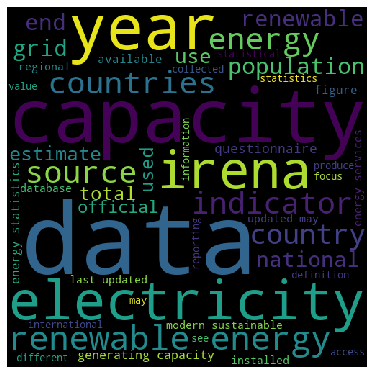

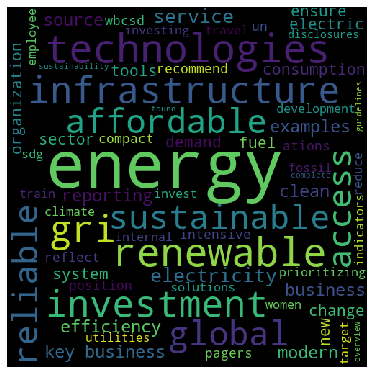

In [60]:
# Python program to generate WordCloud 
# do wordart for ALL pdfs for frequency only
# iterate through list of lists where each list contains a long string
for pdf in mypdfs:
    wordcloud = WordCloud(width = 500, height = 500, 
                      background_color ='black',
                      min_font_size = 10).generate(pdf) 

    # plot the WordCloud image
    plt.figure(figsize = (8, 5), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

plt.show()

## Visualation Continued
These word clouds allow the data to be better understood but are currently per PDF, this can be improved by creating a single Word Cloud that takes into account all unqiue words across all the documents. This is given below, it should be noted that this one is a lot larger due to their being more words than previous word clouds. This leads to a small bias as certain words, such as energy, appear in every pdf, this therefore makes other words look like they're less used.

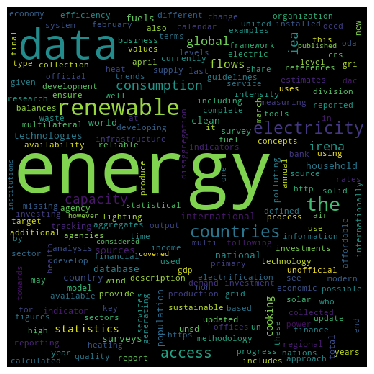

In [61]:
# do wordart for only unique words in tfidf
# declare a dict to hold sum values for each col (k:col, v:sum)
all_keywords = {}
for col in df_tfidf_pdfs:
    all_keywords[col] = df_tfidf_pdfs[col].sum()
    
# Generate wordcloud
# relative_scaling adjusts importance of a frequency word
wordcloud = WordCloud(width=500,height=500,relative_scaling=1,
                      background_color ='black', min_font_size = 10, 
                      normalize_plurals=False).generate_from_frequencies(all_keywords)

# plot the WordCloud image
plt.figure(figsize = (8, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

## Evaluating the Data Numerically
This data can also be broken down numerically by calculating the Recall, Precision and F1-Score of the data, this will show how accurate the system is at getting the keywords when compared to the given keywords. The code for calculating this can be seen below.
For using this part of the program for data thats not the default the Zonodo keywords will need to be changed to a list of keywords either obtained from another source or generated by you.

In [62]:
#obtained keywords from Zonodo
Zonodo_Keywords=['absorption heat pump','agrivoltaic', 'air source heat pumps','airborne wind turbine','alcohol fuel','algae bioreactor','algae fuel','alkaline anion exchange membrane fuel cell','alkaline fuel cell','alternative energy','alternative fuel','alternatives to car use','aluminium recycling','aluminium–air battery','appliance recycling','autonomous building', 'bi-fuel vehicle', 'biobased economy', 'bioconversion', 'biodegradable electronics', 'bioenergy', 'biofuel', 'biogas', 'biogasoline', 'biological hydrogen production (algae)', 'biomass briquettes', 'blue carbon', 'bottle recycling', 'building insulation', 'building performance', 'cap and dividend', 'carbon capture and utilisation', 'carbon dioxide removal', 'carbon dioxide scrubber', 'carbon emission', 'carbon farming', 'carbon footprint', 'carbon intensity', 'carbon offset', 'carbon pollution reduction scheme', 'carbon sequestration', 'carbon tax', 'carbon-based fuel', 'carbon-neutral fuel', 'carbonzero programme', 'carpool', 'carsharing', 'certification for sustainable transportation', 'charcoal', 'charging station', 'chicago climate action plan', 'chinese national carbon trading scheme', 'clean energy', 'clean fuel', 'clean technology', 'cleaner production', 'climate capitalism', 'co2 emission', 'co2balance', 'coal consumption', 'coalbed methane', 'combined gas and steam', 'combined nuclear and steam propulsion', 'combined steam and gas', 'common external power supply', 'compressed air car', 'compressed-air vehicle', 'double glazing', 'ecohouse', 'electric energy', 'electric motor','electric power', 'electric power distribution', 'electrical energy', 'electrical grid', 'electrical power', 'electricity', 'electricity consumption', 'electricity cost', 'electricity generation', 'electricity market', 'electrofuel', 'emissions trading', 'energy', 'energy audit', 'energy conservation', 'energy consumption', 'energy conversion efficiency', 'energy cost', 'energy crop', 'energy demand', 'energy efficiency', 'energy harvesting', 'energy intensity', 'energy management', 'energy performance', 'energy poverty', 'energy productivity', 'energy research', 'energy transition', 'energy usage', 'energy use', 'fluorescent lamp recycling', 'formic acid fuel cell', 'fossil fuel phase-out', 'fuel consumption', 'fuel efficiency', 'fuel poverty', 'fusion power', 'geothermal desalination', 'geothermal energy', 'geothermal heat pump', 'geothermal heating', 'geothermal power','german climate action plan 2050', 'green energy', 'green technologies', 'greenhouse debt', 'greenhouse gas', 'ground heat exchanger','hybrid power', 'hydrogen fuel', 'hydrogen station', 'hydrogen technologies', 'hydrogen vehicle', 'infrastructure upgrade', 'less energy', 'liquid nitrogen engine', 'lithium economy', 'lithium–air battery', 'low carbon communities', 'low-carbon economy', 'magnesium battery', 'meat tax', 'metal–air electrochemical cell', 'microbiofuel', 'natural gas storage', 'nuclear power', 'nuclear safety and security', 'osmotic power', 'pellet fuel', 'pellet stove', 'phase-out of fossil fuel vehicles', 'photobioreactor', 'photovoltaic', 'photovoltaic power station', 'photovoltaic system', 'plastic recycling', 'power consumption', 'public schemes for energy efficient refurbishment', 'renewable electricity', 'renewable energy', 'renewable fuels', 'renewable generation', 'renewable natural gas', 'renewable power', 'renewable resources', 'renewable sources', 'reversed electrodialysis', 'seaweed fuel', 'smart grid', 'solar air conditioning', 'solar air heat', 'solar bus', 'solar car', 'solar cell', 'solar charger', 'solar cooker', 'solar energy', 'solar panel', 'solar power', 'solar roadway', 'solar thermal collector', 'solar updraft tower', 'solar vehicle', 'solar water heating', 'solar-powered refrigerator', 'sustainable aviation fuel', 'sustainable electronic', 'sustainable energy', 'sustainable power', 'sustainable transport', 'synthetic fuel', 'technology upgrade', 'thermal energy', 'thermoelectric generator', 'thermophotonics', 'thermophotovoltaic', 'tidal energy', 'tidal stream generator', 'tide mill', 'vehicle-to-grid', 'waste heat recovery unit', 'water heat recycling', 'wave energy', 'wave power', 'wind energy', 'wind farm', 'wind farms', 'wind generation', 'wind power', 'wind resource', 'windbelt', 'windpump','wood energy']
len(Zonodo_Keywords)

205

In [63]:
#number of key words obtained by the program
len(all_keywords)

1703

In [67]:
#all words that exist in both lists
true_positives=[]
for word in Zonodo_Keywords:
     if word in all_keywords:
        true_positives.append(word)

#all words that are in Zonodo's and the PDFs but not in obtained keywords
false_negatives=[]
for word in pdf_data_list_of_strings:
    if word in Zonodo_Keywords:
        false_negatives.append(word)
false_negatives

[]

In [65]:
#calculate precision and recall using appropriate algorithms
Recall=100*(len(true_positives)/(len(true_positives)+len(false_negatives)))
print('Recall=',Recall)

Precision=100*((len(true_positives))/len(all_keywords))
print('Precision=', Precision)

Recall= 100.0
Precision= 0.46975924838520255


In [72]:
#calculate F1-Score
f1=200*(Precision*Recall)/(Precision+Recall)
print('F1 Score=', f1)

F1 Score= 93.51256575102279


The best results should be a 50/50 between both recall and precision, as one high and one low will generally lead to a bad f1 score and non-precise or accurate system.